<a href="https://colab.research.google.com/github/zolzayakh/Dive-into-coding/blob/main/Binary_classification_of_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**[Problem 1] Select features and categories for practice**

In [4]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
x = pd.DataFrame(data=iris.data, columns=iris.feature_names)
y = pd.DataFrame(data=iris.target, columns={'Species'})
df = pd.concat([x,y], axis = 1)
selected_ = df[df['Species'] > 0].iloc[:, [1,3, 4]]
print(selected_)

     sepal width (cm)  petal width (cm)  Species
50                3.2               1.4        1
51                3.2               1.5        1
52                3.1               1.5        1
53                2.3               1.3        1
54                2.8               1.5        1
..                ...               ...      ...
145               3.0               2.3        2
146               2.5               1.9        2
147               3.0               2.0        2
148               3.4               2.3        2
149               3.0               1.8        2

[100 rows x 3 columns]


**[Problem 2] Data analysis**

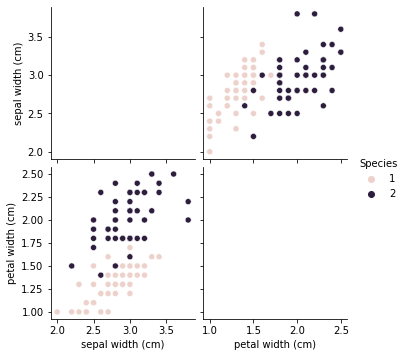

In [5]:
import seaborn as sns
sns.pairplot(selected_, hue="Species", diag_kind="scatter")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


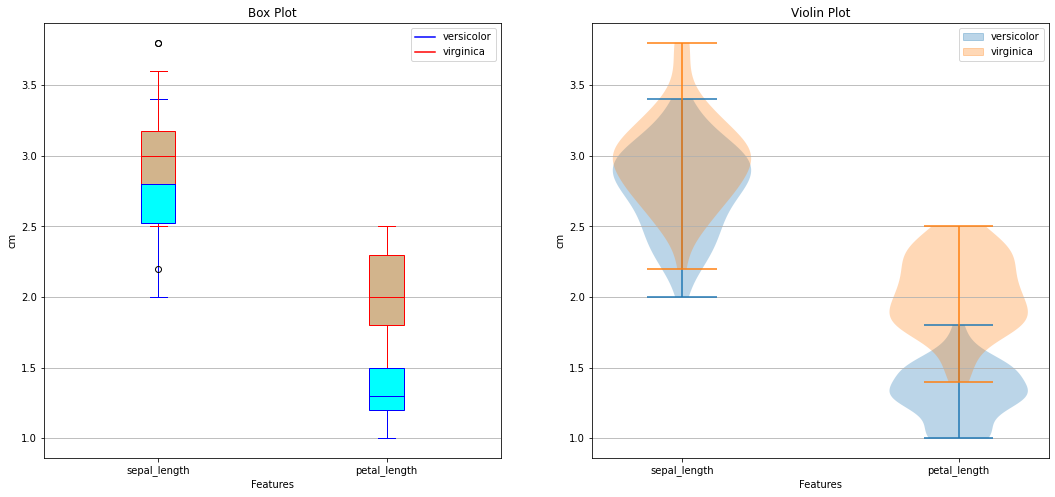

In [6]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

legend1 = []
labels = list(iris.target_names)

def box_plot(ax, data, edge_color, fill_color):
    bp = ax.boxplot(data, patch_artist=True)
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)       
        
    return bp

legends = []

def violin_plot(ax, data, label):
    bp = ax.violinplot(data)
    
    color = bp["bodies"][0].get_facecolor().flatten()
    legends.append((mpatches.Patch(color=color), label))
        
    return bp

data1  = [selected_[selected_['Species']==1].iloc[:, 0], selected_[selected_['Species']==1].iloc[:, 1]] 
data2  = [selected_[selected_['Species']==2].iloc[:, 0], selected_[selected_['Species']==2].iloc[:, 1]]

fig1, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
axs[0].set_title('Box Plot')
axs[1].set_title('Violin Plot')

# draw box plot
d1 = box_plot(axs[0], data1, 'blue', 'cyan')
d2 = box_plot(axs[0], data2, 'red', 'tan')
# draw violin plot
d4 = violin_plot(axs[1], data1, labels[1])
d5 = violin_plot(axs[1], data2, labels[2])

for ax in axs:
    ax.yaxis.grid(True)
    ax.set_xticks([1,2],["sepal_length", "petal_length"])
    ax.set_xlabel('Features')
    ax.set_ylabel('cm')

plt.setp(axs, xticks=[1,2],
         xticklabels=["sepal_length", "petal_length"])

axs[1].legend(*zip(*legends), loc=1)
axs[0].plot([], c='blue', label=labels[1])
axs[0].plot([], c='red', label=labels[2])
axs[0].legend()
plt.show()

**[Problem 3] Division of preprocessing/training data and verification data**


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X = selected_.iloc[:,:-1]
Y = selected_.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.25)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(75, 2)
(25, 2)
(75,)
(25,)


**[Problem 4] Pretreatment/Standardization**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)
print(X_train_scaler)

**[Problem 5] Learning and estimation**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#knn=5
knn5=KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train_scaler, y_train)
predict5=knn5.predict(X_test_scaler)

#knn=3
knn3=KNeighborsClassifier(n_neighbors=5)
knn3.fit(X_train_scaler, y_train)
predict3=knn3.predict(X_test_scaler)

**[Problem 6] Evaluation**

True Positives (TP) - These are the correctly predicted positive values which means that the value of actual class is yes and the value of predicted class is also yes. 

True Negatives (TN) - These are the correctly predicted negative values which means that the value of actual class is no and value of predicted class is also no. 

False positives and false negatives, these values occur when your actual class contradicts with the predicted class.

False Positives (FP) – When actual class is no and predicted class is yes. 

False Negatives (FN) – When actual class is yes but predicted class in no. 

**Accuracy** - Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations. 

**Accuracy = TP+TN/TP+FP+FN+TN**

**Precision** - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. 

**Precision = TP/TP+FP**

**Recall (Sensitivity)** - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. 

**Recall = TP/TP+FN**

**F1 score** - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. 

**F1 Score = 2*(Recall * Precision) / (Recall + Precision)**


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#knn=5
accuracy5 = accuracy_score(y_test, predict5)
precision5 = precision_score(y_test, predict5)
recall5 = recall_score(y_test, predict5)
f15 = f1_score(y_test, predict5)


#knn=3
accuracy3 = accuracy_score(y_test, predict3)
precision3 = precision_score(y_test, predict3)
recall3 = recall_score(y_test, predict3)
f13 = f1_score(y_test, predict3)


print("Classification Report at knn of 5:\n", classification_report(y_test, predict5))
print("Confusion Matrix at knn of 5:\n", confusion_matrix(y_test, predict5), "\n------------------------------------------------------------")

print("Classification Report at knn of 3:\n", classification_report(y_test, predict3))
print("Confusion Matrix at knn of 3:\n", confusion_matrix(y_test, predict3))

Classification Report at knn of 5:
               precision    recall  f1-score   support

           1       0.86      0.86      0.86        14
           2       0.82      0.82      0.82        11

    accuracy                           0.84        25
   macro avg       0.84      0.84      0.84        25
weighted avg       0.84      0.84      0.84        25

Confusion Matrix at knn of 5:
 [[12  2]
 [ 2  9]] 
------------------------------------------------------------
Classification Report at knn of 3:
               precision    recall  f1-score   support

           1       0.86      0.86      0.86        14
           2       0.82      0.82      0.82        11

    accuracy                           0.84        25
   macro avg       0.84      0.84      0.84        25
weighted avg       0.84      0.84      0.84        25

Confusion Matrix at knn of 3:
 [[12  2]
 [ 2  9]]


[[12  2]
 [ 2  9]]


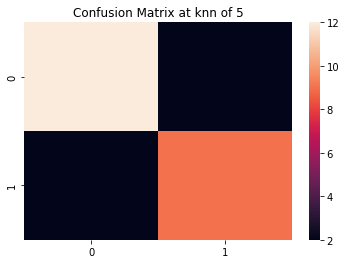

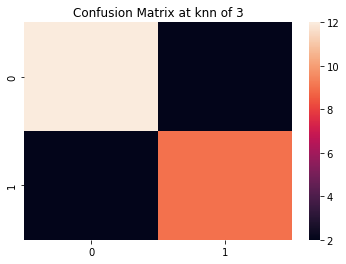

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
cm5 = confusion_matrix(y_test, predict5)
cm3 = confusion_matrix(y_test, predict3)
print(cm5)
fig, ax = plt.subplots()
sns.heatmap(cm5).set(title = 'Confusion Matrix at knn of 5')
plt.show()
sns.heatmap(cm3).set(title = 'Confusion Matrix at knn of 3')
plt.show()


**[Problem 7] Visualization**

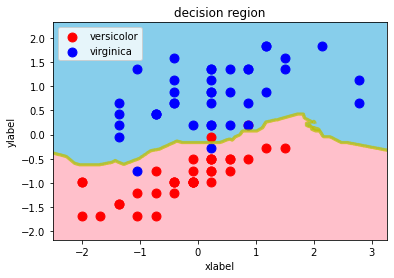

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

decision_region(X_train_scaler, y_train, knn3, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])

**[Problem 8] Learning by other methods**

Logistic regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold

# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_scaler, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.946429 using {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.941667 (0.066964) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.941667 (0.066964) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.941667 (0.066964) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.941667 (0.066964) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.941667 (0.066964) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.941667 (0.066964) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.946429 (0.065854) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.946429 (0.065854) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.946429 (0.065854) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.937500 (0.076564) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.937500 (0.076564) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.933333 (0.076450) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.895238 (0.098429) wit

In [ ]:
model_lr = LogisticRegression(C = 1.0, solver = 'newton-cg').fit(X_train_scaler, y_train)
prediction_lr = model_lr.predict(X_test_scaler)
print("Accuracy of logistic regression : ", accuracy_score(y_test, prediction_lr))
print("Precision of logistic regression : ", precision_score(y_test, prediction_lr))
print("Recall of logistic regression : ", recall_score(y_test, prediction_lr))
print("F1 score of logistic regression : ", f1_score(y_test, prediction_lr))



Accuracy of logistic regression :  0.92
Precision of logistic regression :  0.9285714285714286
Recall of logistic regression :  0.9285714285714286
F1 score of logistic regression :  0.9285714285714286


SVM

In [ ]:
from sklearn.svm import SVC
model_svc = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model_svc, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_scaler, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.946429 using {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.907143 (0.101582) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.923214 (0.076896) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.798810 (0.115630) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.880357 (0.118644) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.941667 (0.066964) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.813095 (0.113102) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.911310 (0.093755) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.946429 (0.065854) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.842857 (0.094311) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.849405 (0.152619) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.946429 (0.065854) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.938095 (0.066454) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.669048 (0.134797) with: {'C': 0.01, 'gamma': 'scale',

In [ ]:
model_svm = SVC(C = 1.0, gamma = 'scale', kernel = 'rbf').fit(X_train_scaler, y_train)
prediction_svm = model_svm.predict(X_test_scaler)
print("Accuracy of SVM : ", accuracy_score(y_test, prediction_svm))
print("Precision of SVM : ", precision_score(y_test, prediction_svm))
print("Recall of SVM : ", recall_score(y_test, prediction_svm))
print("F1 score of SVM : ", f1_score(y_test, prediction_svm))


Accuracy of SVM :  0.88
Precision of SVM :  0.8666666666666667
Recall of SVM :  0.9285714285714286
F1 score of SVM :  0.896551724137931


Decision tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
criterion = ['gini', 'entropy']
max_depth = [1,2,3,4,5,6,7,8,9,10]
# define grid search
grid = dict(criterion=criterion, max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model_dt, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_scaler, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.923810 using {'criterion': 'gini', 'max_depth': 1}
0.923810 (0.084884) with: {'criterion': 'gini', 'max_depth': 1}
0.923810 (0.084884) with: {'criterion': 'gini', 'max_depth': 2}
0.901190 (0.093443) with: {'criterion': 'gini', 'max_depth': 3}
0.901190 (0.093443) with: {'criterion': 'gini', 'max_depth': 4}
0.901190 (0.093443) with: {'criterion': 'gini', 'max_depth': 5}
0.901190 (0.093443) with: {'criterion': 'gini', 'max_depth': 6}
0.901190 (0.093443) with: {'criterion': 'gini', 'max_depth': 7}
0.901190 (0.093443) with: {'criterion': 'gini', 'max_depth': 8}
0.901190 (0.093443) with: {'criterion': 'gini', 'max_depth': 9}
0.901190 (0.093443) with: {'criterion': 'gini', 'max_depth': 10}
0.923810 (0.084884) with: {'criterion': 'entropy', 'max_depth': 1}
0.923810 (0.084884) with: {'criterion': 'entropy', 'max_depth': 2}
0.896429 (0.104165) with: {'criterion': 'entropy', 'max_depth': 3}
0.896429 (0.104165) with: {'criterion': 'entropy', 'max_depth': 4}
0.896429 (0.104165) with: {'crit

In [ ]:
model_dtc = DecisionTreeClassifier(criterion ='gini', max_depth=1).fit(X_train_scaler, y_train)
prediction_dtc = model_dtc.predict(X_test_scaler)
print("Accuracy of Decision tree : ", accuracy_score(y_test, prediction_dtc))
print("Precision of Decision tree : ", precision_score(y_test, prediction_dtc))
print("Recall of Decision tree : ", recall_score(y_test, prediction_dtc))
print("F1 score of Decision tree : ", f1_score(y_test, prediction_dtc))


Accuracy of Decision tree :  0.92
Precision of Decision tree :  0.875
Recall of Decision tree :  1.0
F1 score of Decision tree :  0.9333333333333333


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model_rf, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_scaler, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.932738 using {'max_features': 'log2', 'n_estimators': 10}
0.904762 (0.089563) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.923214 (0.076896) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.923214 (0.076896) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.932738 (0.076970) with: {'max_features': 'log2', 'n_estimators': 10}
0.923214 (0.076896) with: {'max_features': 'log2', 'n_estimators': 100}
0.923214 (0.076896) with: {'max_features': 'log2', 'n_estimators': 1000}


In [ ]:
model_rf = RandomForestClassifier(n_estimators=10, max_features='log2').fit(X_train_scaler, y_train)
prediction_rf = model_rf.predict(X_test_scaler)
print("Accuracy of Random Forest : ", accuracy_score(y_test, prediction_rf))
print("Precision of Random Forest : ", precision_score(y_test, prediction_rf))
print("Recall of Random Forest : ", recall_score(y_test, prediction_rf))
print("F1 score of Random Forest: ", f1_score(y_test, prediction_rf))

Accuracy of Random Forest :  0.84
Precision of Random Forest :  0.8571428571428571
Recall of Random Forest :  0.8571428571428571
F1 score of Random Forest:  0.8571428571428571
